In [1]:
import os
import scanpy as sc
sc.set_figure_params(dpi=100, dpi_save=1000, vector_friendly=True)
import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt
font_dirs = "/data/projects/robin/fonts"
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.pyplot.rcParams['font.family'] = "Arial"

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks")

In [3]:
adata = sc.read("ROI.h5ad")

In [4]:
adata.obs.Disease.unique()

['ANCA', 'GBM', 'SLE', 'Cntrl']
Categories (4, object): ['ANCA', 'Cntrl', 'GBM', 'SLE']

In [25]:
adata.obs.Disease.value_counts()

Disease
Cntrl    316
ANCA     315
SLE      247
GBM       96
Name: count, dtype: int64

In [72]:
from sklearn.preprocessing import MinMaxScaler

/home/robin/xenium-cgn/xenium_cgn/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


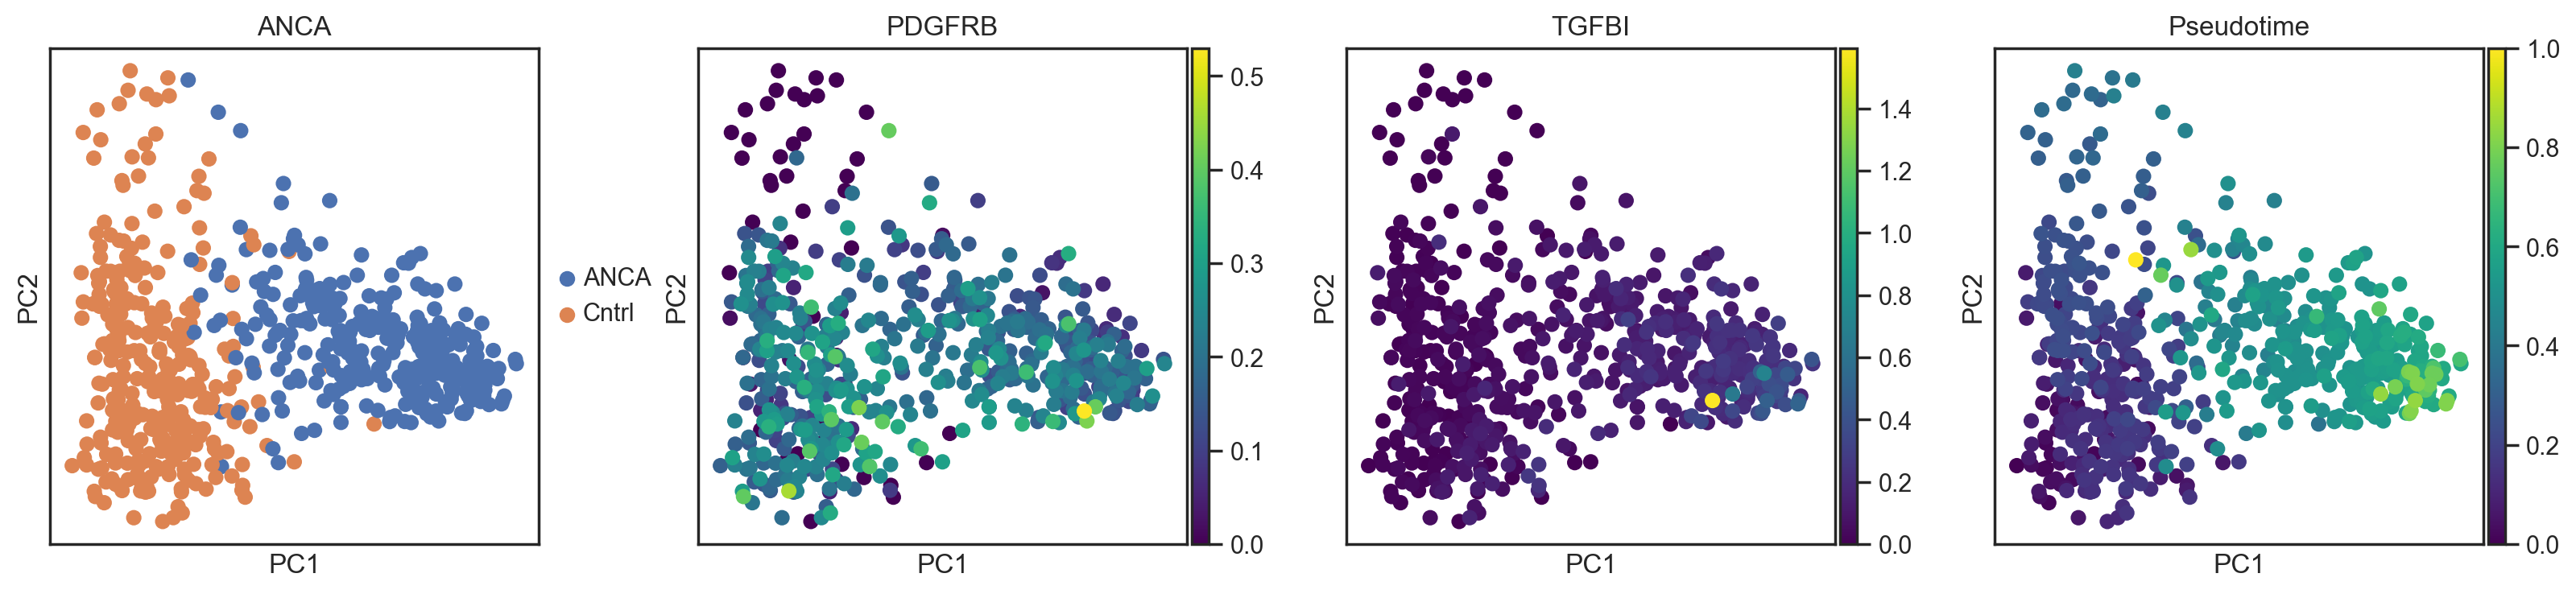

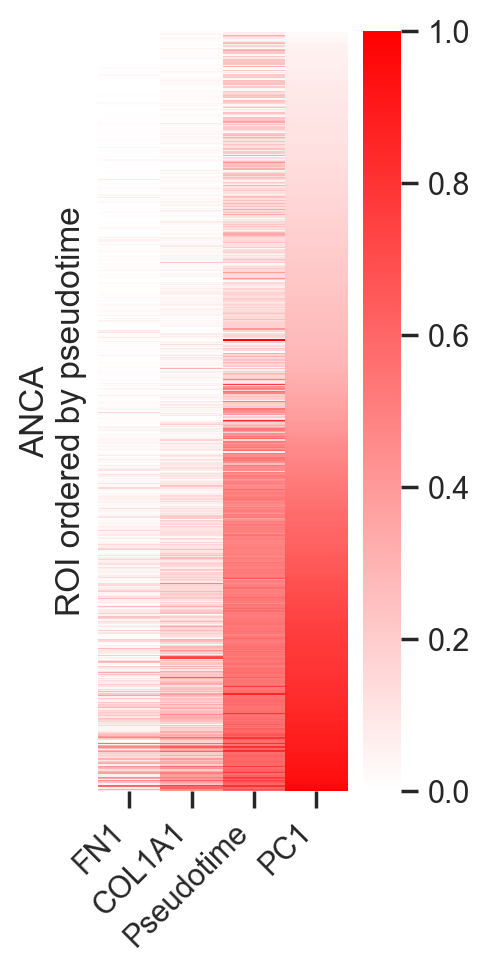

/home/robin/xenium-cgn/xenium_cgn/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca
/home/robin/xenium-cgn/xenium_cgn/lib/python3.11/site-packages/scanpy/neighbors/__init__.py:727: RuntimeWarning: divide by zero encountered in divide
  Q = scipy.sparse.spdiags(1.0 / q, 0, W.shape[0], W.shape[0])
/home/robin/xenium-cgn/xenium_cgn/lib/python3.11/site-packages/scanpy/neighbors/__init__.py:737: RuntimeWarning: divide by zero encountered in divide
  self.Z = scipy.sparse.spdiags(1.0 / z, 0, K.shape[0], K.shape[0])


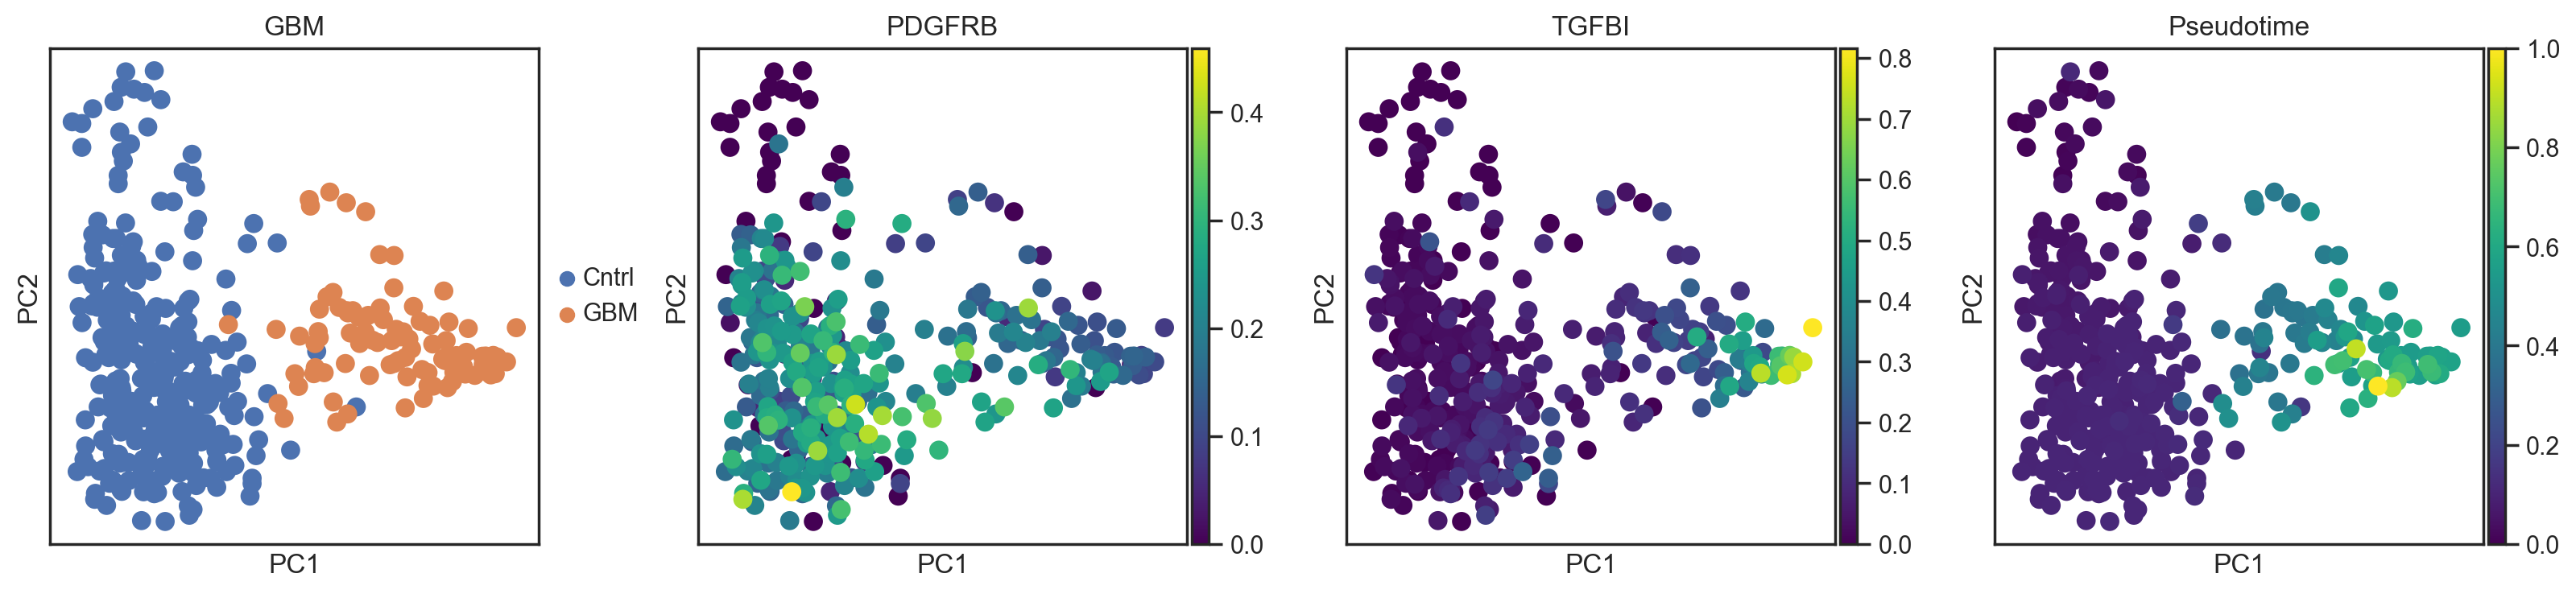

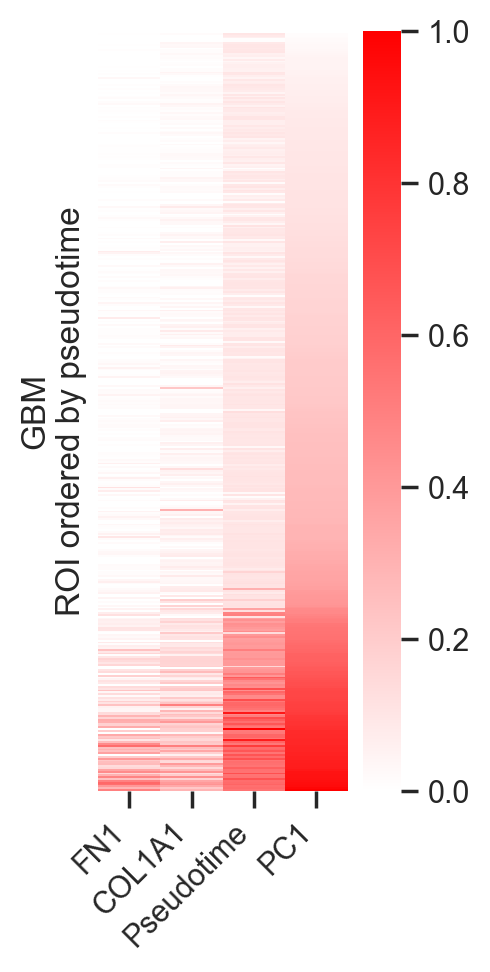

/home/robin/xenium-cgn/xenium_cgn/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


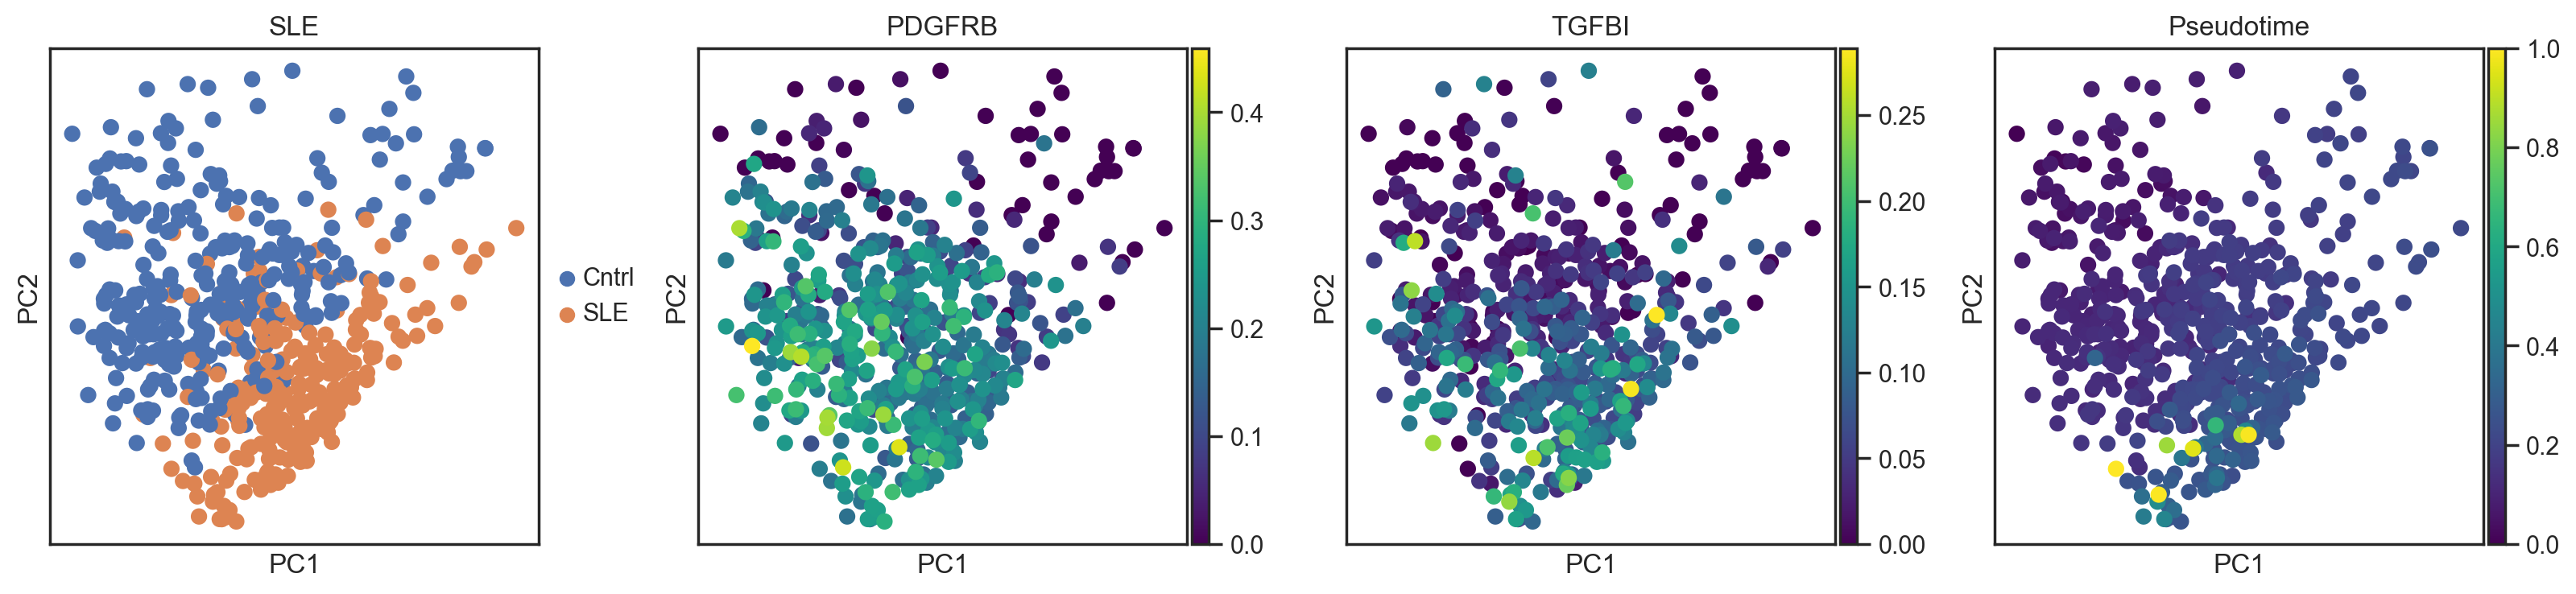

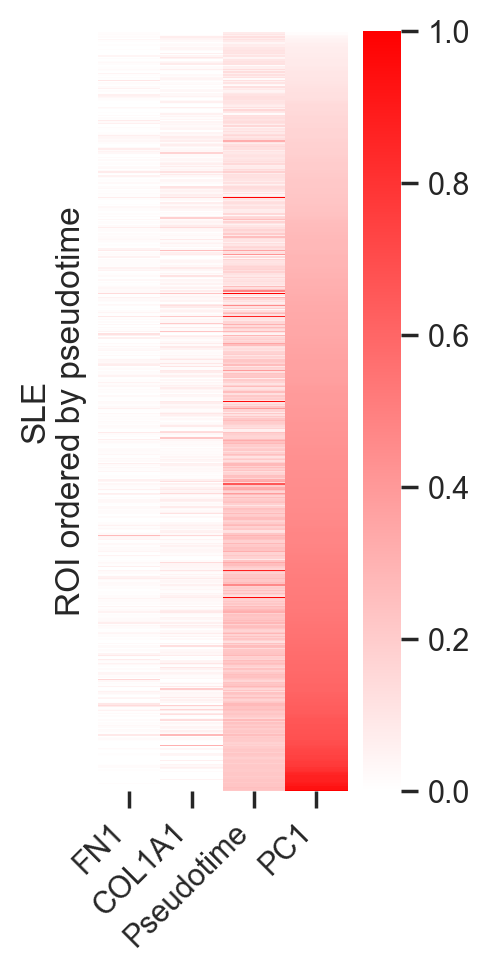

In [74]:
for condition in adata.obs.Disease.unique():
    if condition!="Cntrl":
        sub = adata[adata.obs.Disease.isin([condition, "Cntrl"])]
        sc.tl.pca(sub)
        sc.tl.draw_graph(sub)
        sc.tl.diffmap(sub)
        sc.pp.neighbors(sub, n_neighbors=10, use_rep="X_diffmap")
        sc.tl.draw_graph(sub)
        
        sub.uns["iroot"] = np.where(sub.obsm["X_pca"][:,0]==sub.obsm["X_pca"][:,0].min())[0][0]
        sc.tl.dpt(sub)
        sub.obs["Pseudotime"] = sub.obs["dpt_pseudotime"].tolist()
        
        sc.pl.pca(sub, color=["Disease", "PDGFRB", "TGFBI", "Pseudotime"], show=False, cmap="viridis", title=condition)
        sub.write(f"{condition}_ps.h5ad")
        plt.show()
        
        order = sub.obs["Pseudotime"].sort_values().index
        sub = sub[order, :]
        tmp = sub.to_df()
        tmp["Pseudotime"] = sub.obs["Pseudotime"].tolist()
        plt.figure(figsize=(2,5))

        pca_df = pd.DataFrame(sub.obsm["X_pca"][:,0], index=sub.obs.index, columns=["PC1"])
        pca_df = pd.DataFrame(MinMaxScaler().fit_transform(pca_df), index=pca_df.index, columns=pca_df.columns)
        pc1 = pca_df["PC1"].sort_values()

        
        order = pc1.index
        tmp = tmp.loc[order]
        tmp["PC1"] = pc1
        
        ax=sns.heatmap(tmp[["FN1", "COL1A1", "Pseudotime", "PC1"]], cmap=cmap)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
        plt.yticks([],[])
        ax.set_ylabel(f"{condition}\nROI ordered by pseudotime")
        plt.show()

In [77]:
pca_df = pd.DataFrame(adata.obsm["X_pca"][:,1], index=adata.obs.index, columns=["PC2"])

In [80]:
adata.to_df().corrwith(pca_df.PC2).sort_values()

PODXL     -0.481269
NOD1      -0.477261
VEGFA     -0.475499
GATA3     -0.465428
SLC8A1    -0.461943
             ...   
SLC13A1    0.665666
SLC22A8    0.686830
LRP2       0.696300
AQP1       0.696304
GPX3       0.786377
Length: 480, dtype: float64

/home/robin/xenium-cgn/xenium_cgn/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


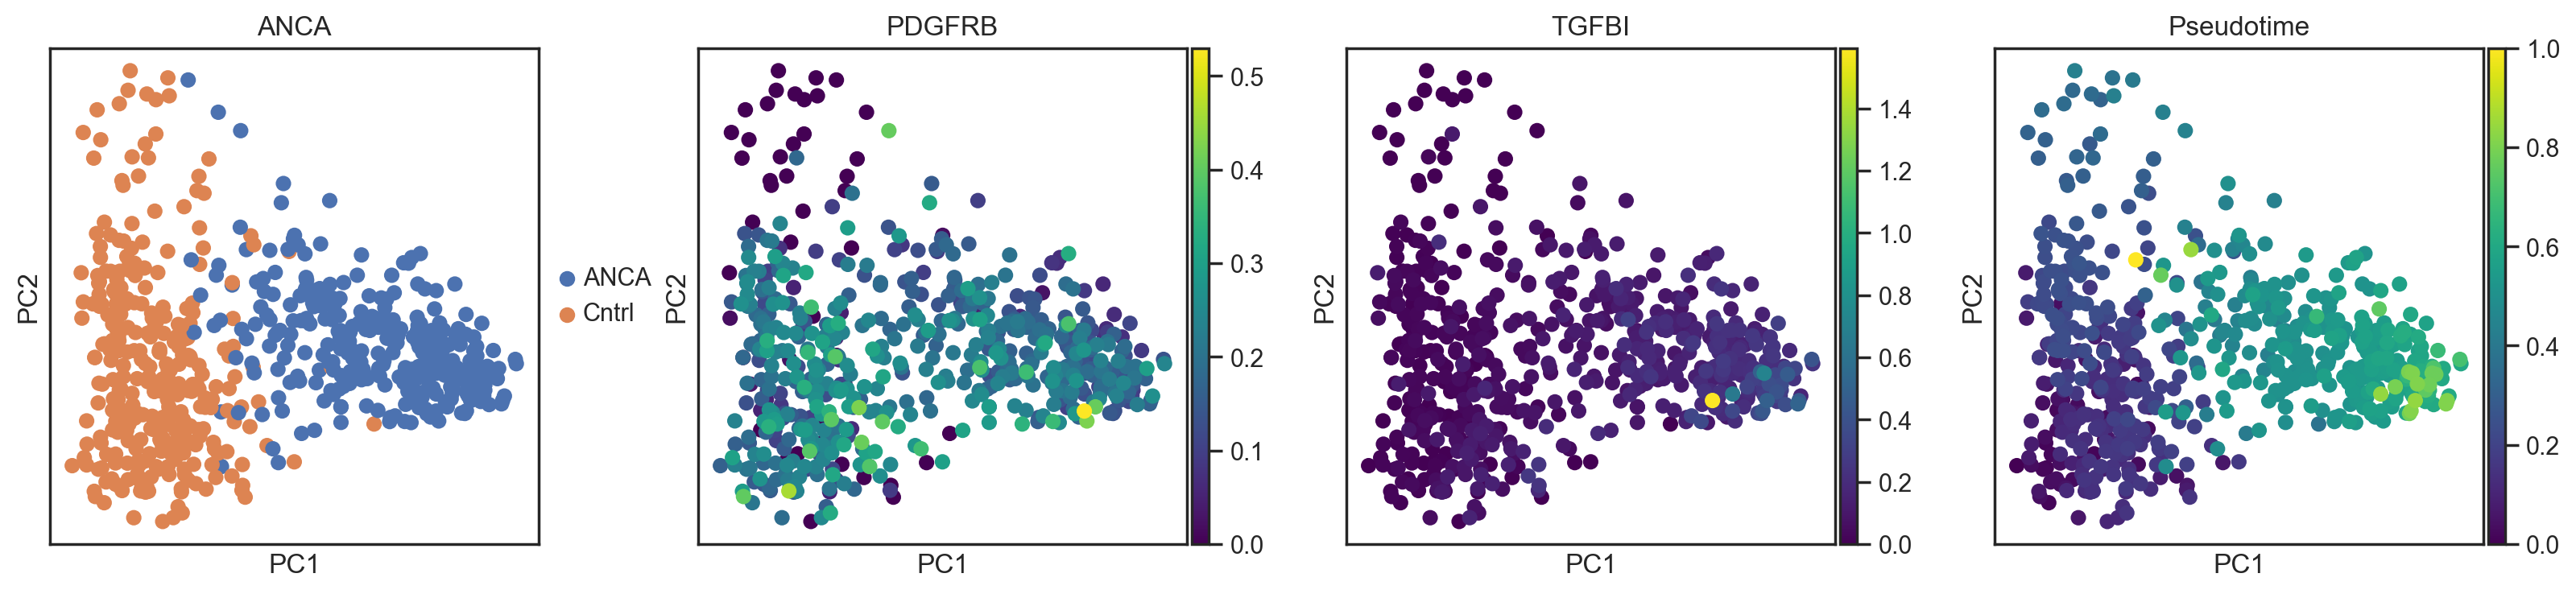

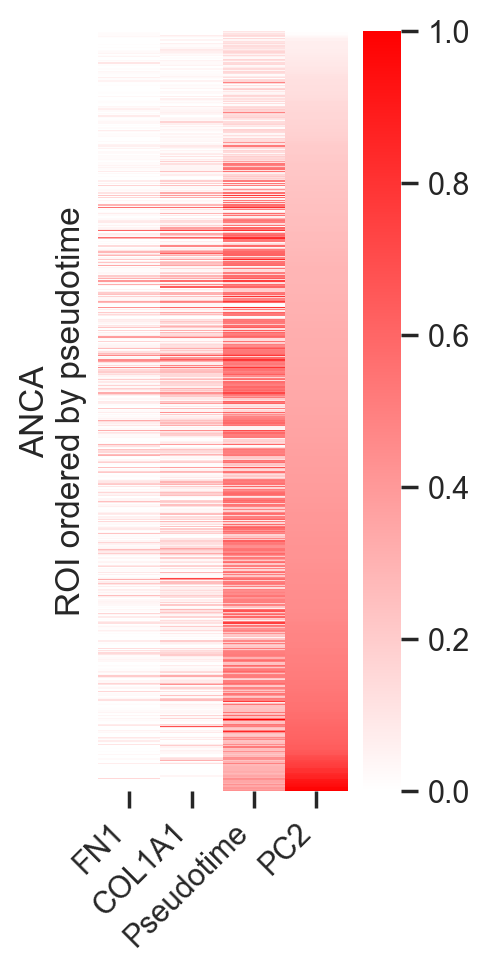

/home/robin/xenium-cgn/xenium_cgn/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca
/home/robin/xenium-cgn/xenium_cgn/lib/python3.11/site-packages/scanpy/neighbors/__init__.py:727: RuntimeWarning: divide by zero encountered in divide
  Q = scipy.sparse.spdiags(1.0 / q, 0, W.shape[0], W.shape[0])
/home/robin/xenium-cgn/xenium_cgn/lib/python3.11/site-packages/scanpy/neighbors/__init__.py:737: RuntimeWarning: divide by zero encountered in divide
  self.Z = scipy.sparse.spdiags(1.0 / z, 0, K.shape[0], K.shape[0])


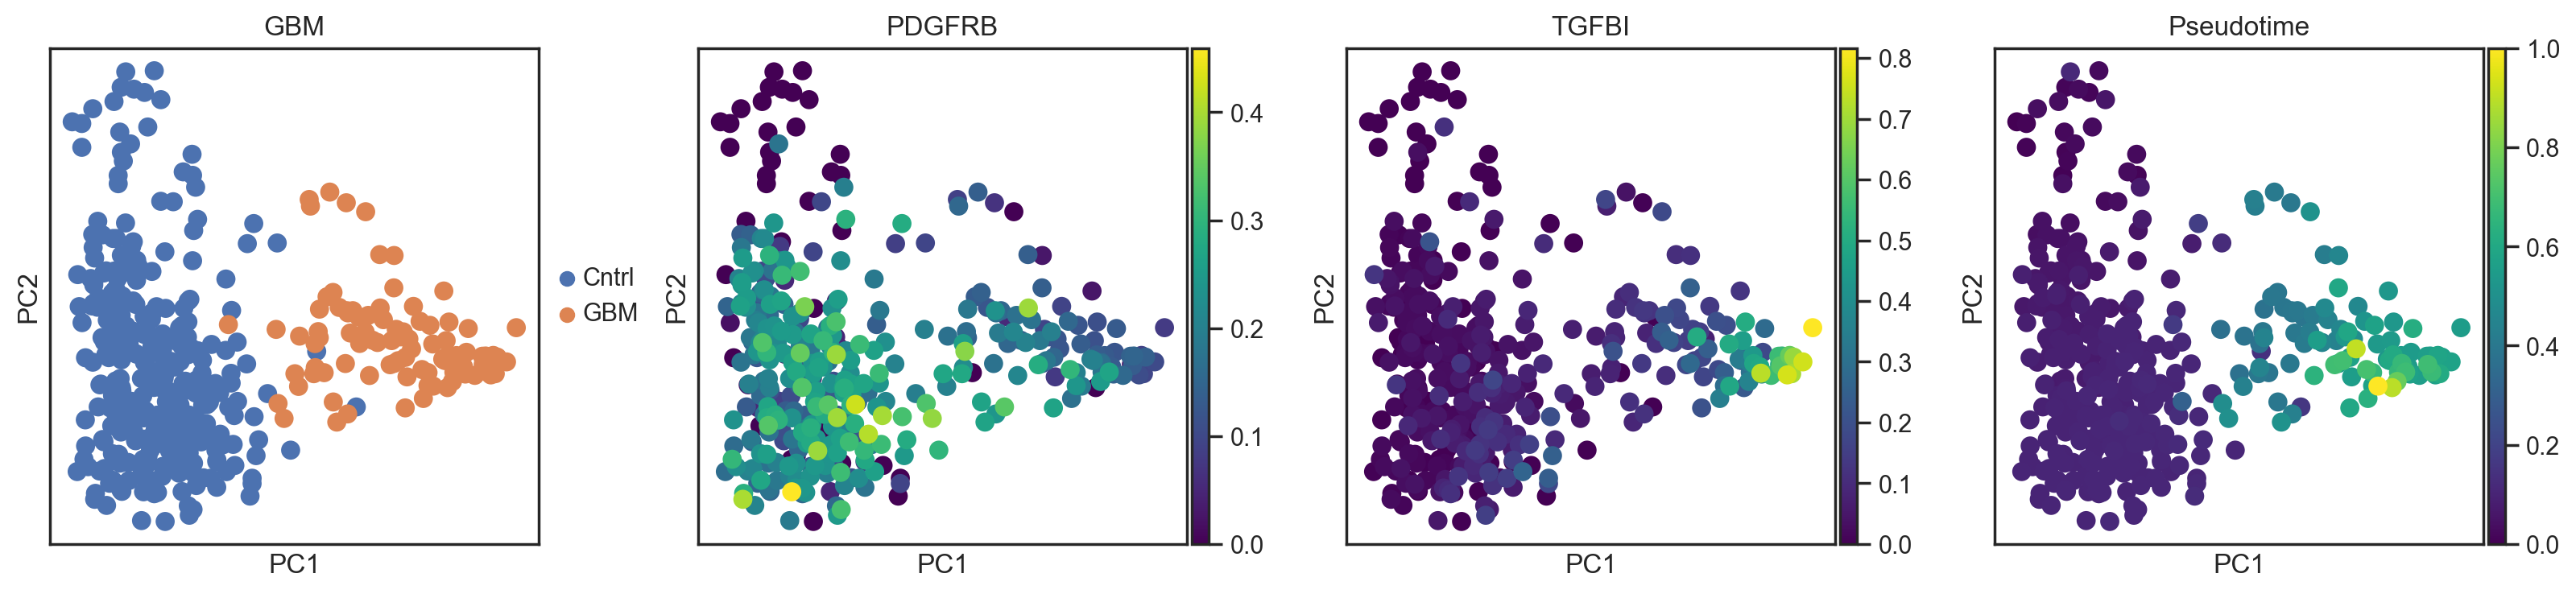

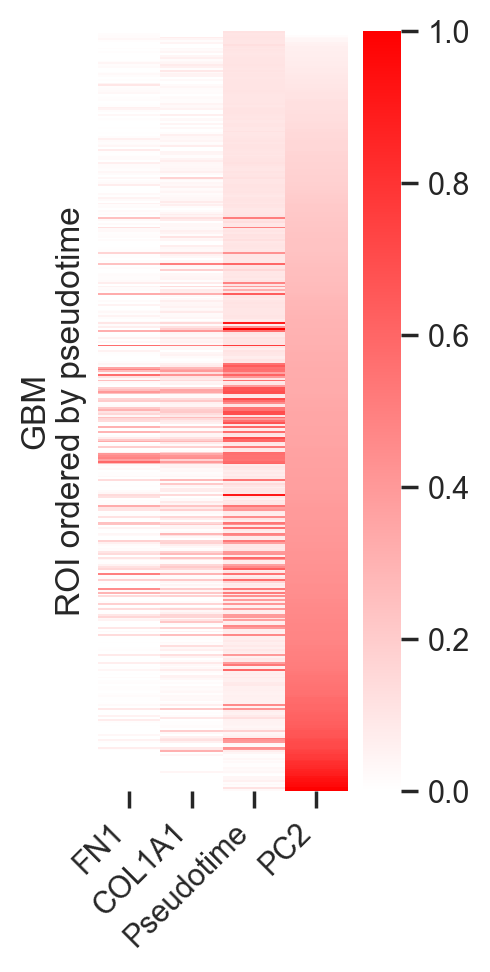

/home/robin/xenium-cgn/xenium_cgn/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


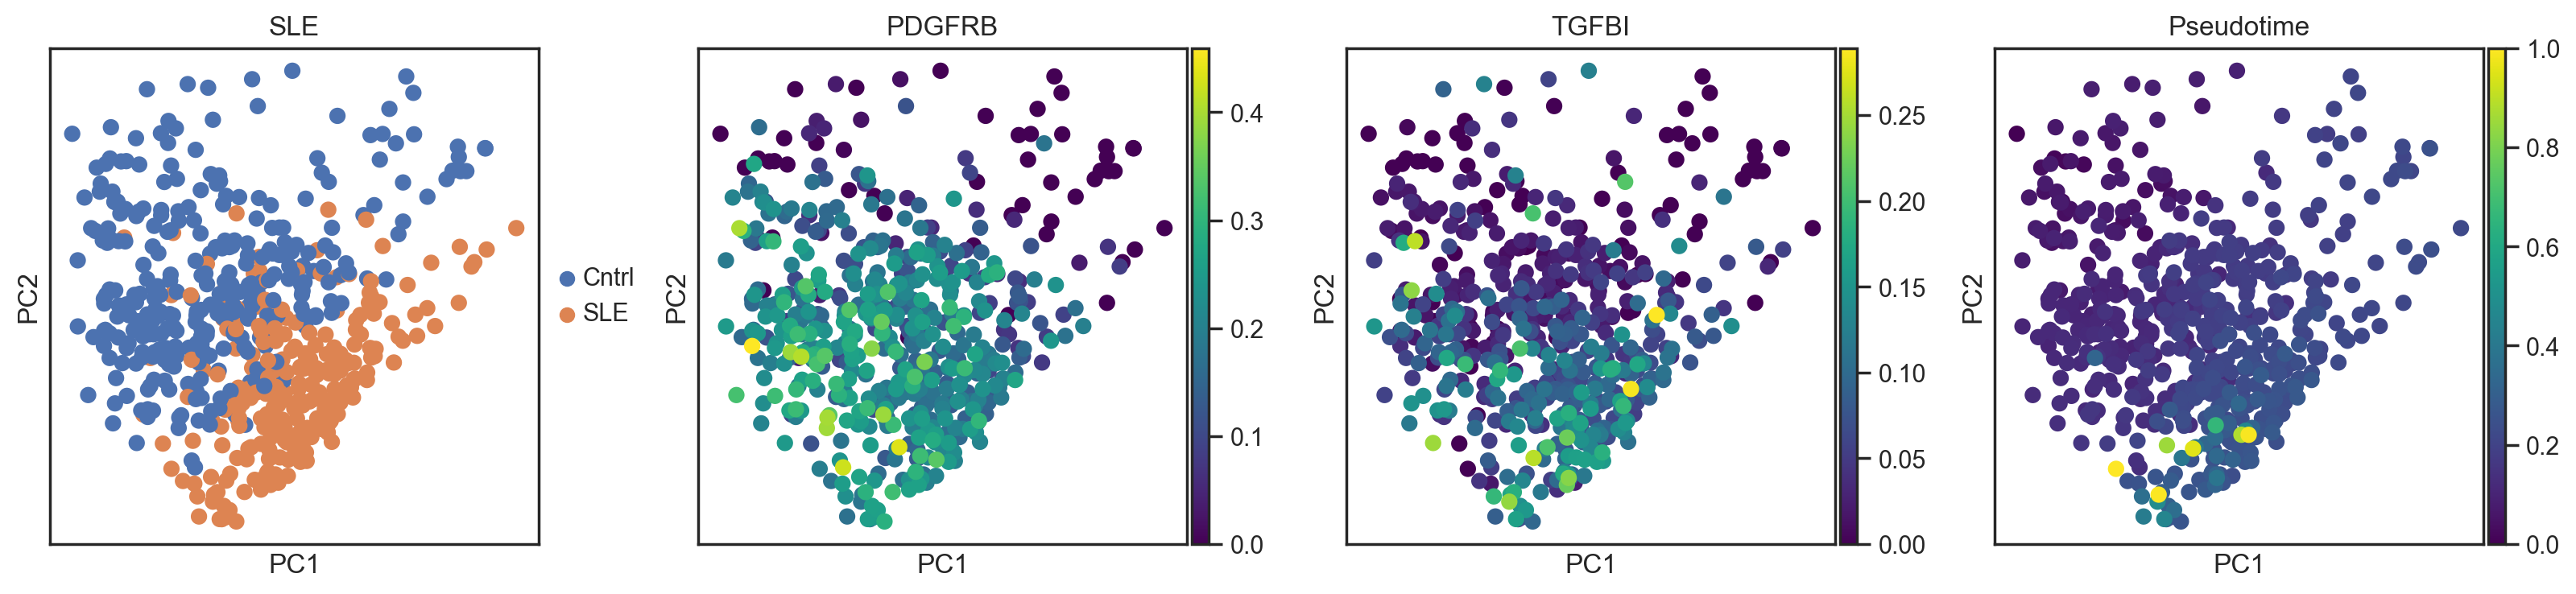

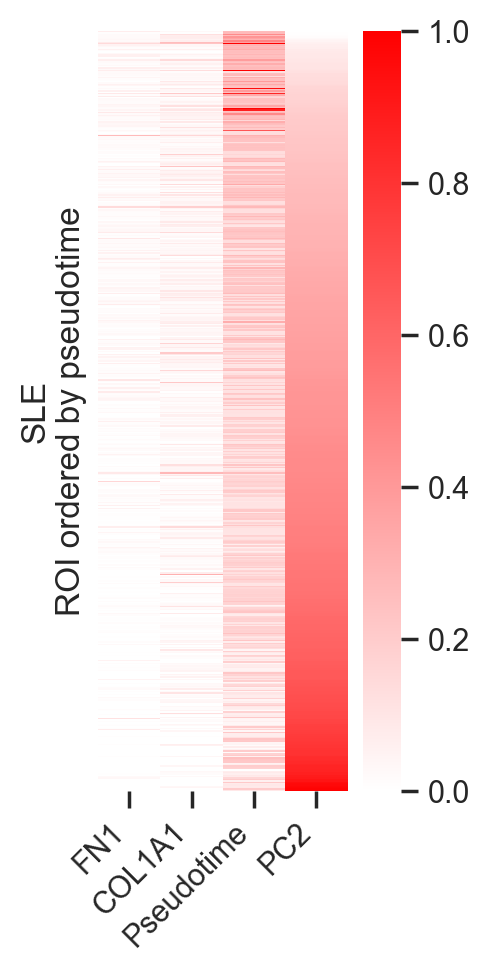

In [76]:
for condition in adata.obs.Disease.unique():
    if condition!="Cntrl":
        sub = adata[adata.obs.Disease.isin([condition, "Cntrl"])]
        sc.tl.pca(sub)
        sc.tl.draw_graph(sub)
        sc.tl.diffmap(sub)
        sc.pp.neighbors(sub, n_neighbors=10, use_rep="X_diffmap")
        sc.tl.draw_graph(sub)
        
        sub.uns["iroot"] = np.where(sub.obsm["X_pca"][:,0]==sub.obsm["X_pca"][:,0].min())[0][0]
        sc.tl.dpt(sub)
        sub.obs["Pseudotime"] = sub.obs["dpt_pseudotime"].tolist()
        
        sc.pl.pca(sub, color=["Disease", "PDGFRB", "TGFBI", "Pseudotime"], show=False, cmap="viridis", title=condition)
        sub.write(f"{condition}_ps.h5ad")
        plt.show()
        
        order = sub.obs["Pseudotime"].sort_values().index
        sub = sub[order, :]
        tmp = sub.to_df()
        tmp["Pseudotime"] = sub.obs["Pseudotime"].tolist()
        plt.figure(figsize=(2,5))

        pca_df = pd.DataFrame(sub.obsm["X_pca"][:,1], index=sub.obs.index, columns=["PC2"])
        pca_df = pd.DataFrame(MinMaxScaler().fit_transform(pca_df), index=pca_df.index, columns=pca_df.columns)
        pc1 = pca_df["PC2"].sort_values()

        
        order = pc1.index
        tmp = tmp.loc[order]
        tmp["PC2"] = pc1
        
        ax=sns.heatmap(tmp[["FN1", "COL1A1", "Pseudotime", "PC2"]], cmap=cmap)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
        plt.yticks([],[])
        ax.set_ylabel(f"{condition}\nROI ordered by pseudotime")
        plt.show()

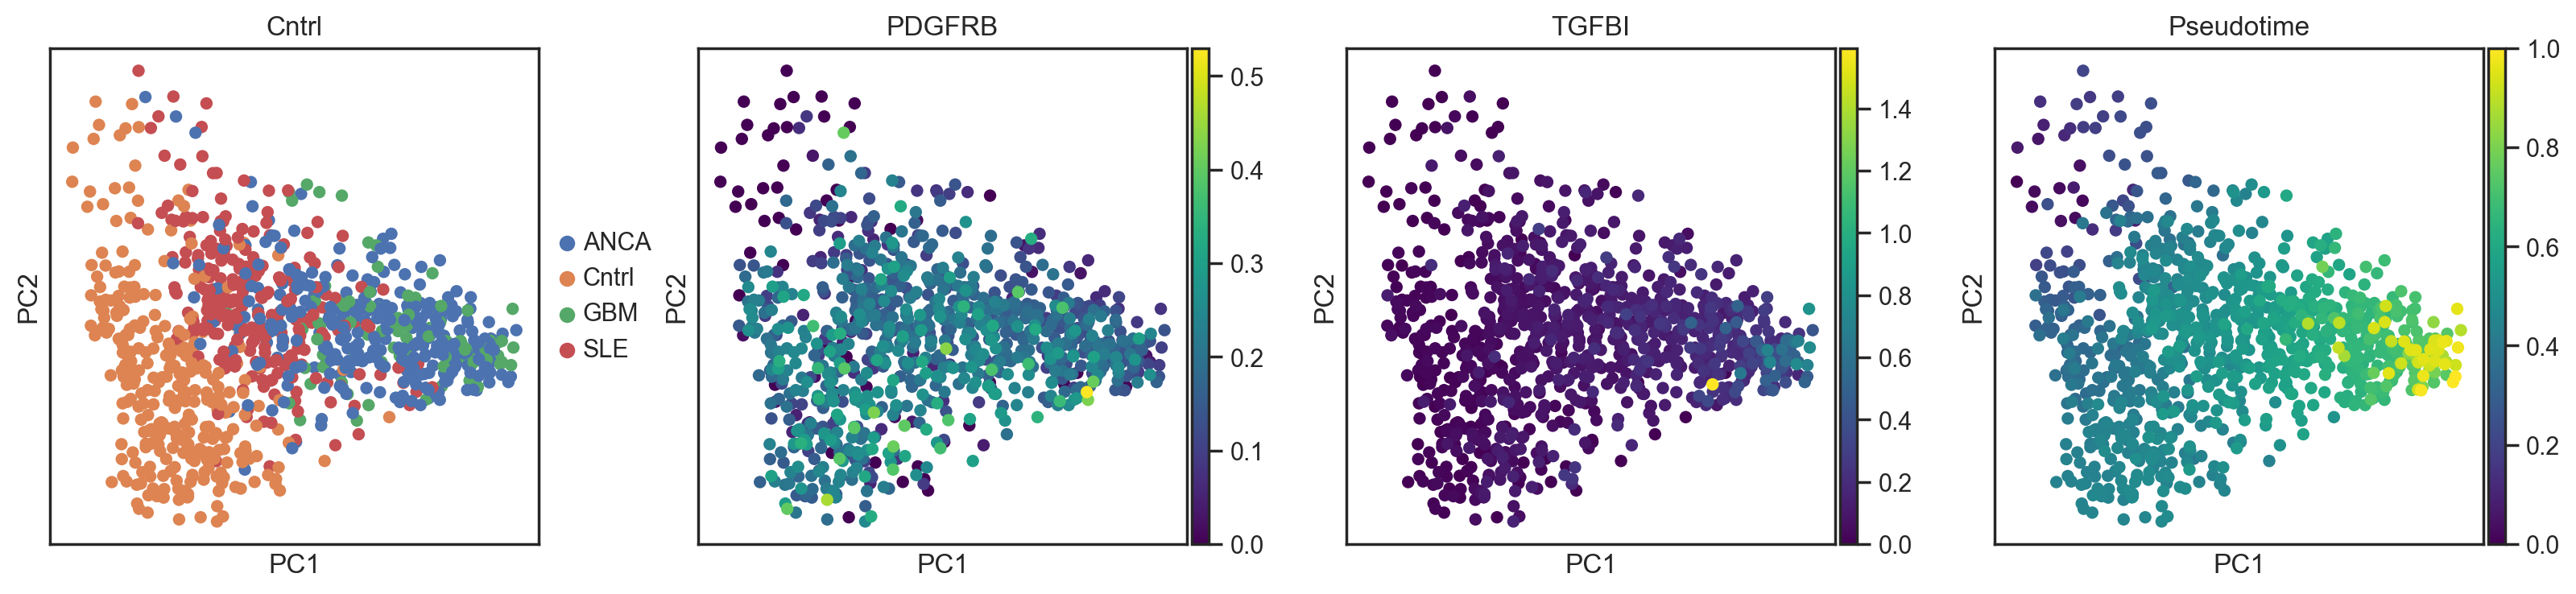

In [26]:
sub = adata.copy()
sc.tl.pca(sub)
sc.tl.draw_graph(sub)
sc.tl.diffmap(sub)
sc.pp.neighbors(sub, n_neighbors=10, use_rep="X_diffmap")
sc.tl.draw_graph(sub)

sub.uns["iroot"] = np.where(sub.obsm["X_pca"][:,0]==sub.obsm["X_pca"][:,0].min())[0][0]
sc.tl.dpt(sub)
sub.obs["Pseudotime"] = sub.obs["dpt_pseudotime"].tolist()

sc.pl.pca(sub, color=["Disease", "PDGFRB", "TGFBI", "Pseudotime"], show=False, cmap="viridis", title=condition)
sub.write(f"all_ps.h5ad")
plt.show()

In [35]:
sub = adata.copy()
sc.tl.pca(sub)
sc.external.pp.harmony_integrate(sub, key="Disease")

2024-11-26 10:05:51,055 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-11-26 10:05:52,224 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-11-26 10:05:52,233 - harmonypy - INFO - Iteration 1 of 10
2024-11-26 10:05:52,427 - harmonypy - INFO - Iteration 2 of 10
2024-11-26 10:05:52,511 - harmonypy - INFO - Iteration 3 of 10
2024-11-26 10:05:52,575 - harmonypy - INFO - Iteration 4 of 10
2024-11-26 10:05:52,658 - harmonypy - INFO - Iteration 5 of 10
2024-11-26 10:05:52,711 - harmonypy - INFO - Converged after 5 iterations


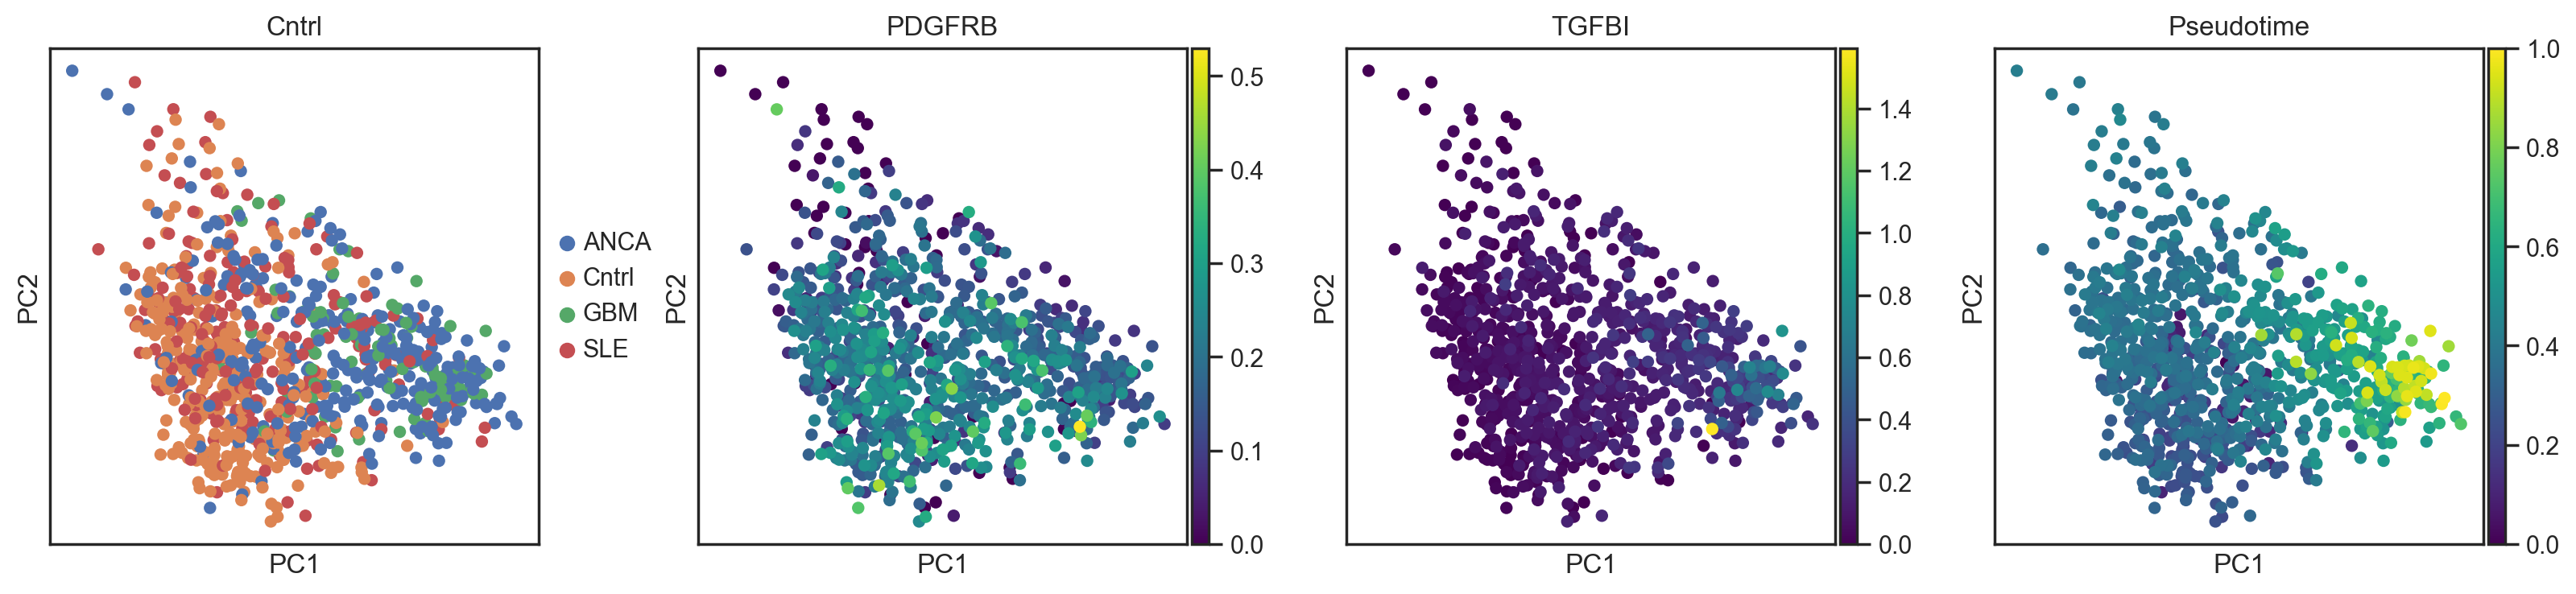

In [36]:
sub.obsm["X_pca"] = sub.obsm["X_pca_harmony"].copy()
sc.tl.draw_graph(sub)
sc.tl.diffmap(sub)
sc.pp.neighbors(sub, n_neighbors=10, use_rep="X_diffmap")
sc.tl.draw_graph(sub)

sub.uns["iroot"] = np.flatnonzero(sub.obs["Disease"] == "Cntrl")[0]
sc.tl.dpt(sub)
sub.obs["Pseudotime"] = sub.obs["dpt_pseudotime"].tolist()

sc.pl.pca(sub, color=["Disease", "PDGFRB", "TGFBI", "Pseudotime"], show=False, cmap="viridis", title=condition)
sub.write(f"all_ps_disease_effect_removed.h5ad")
plt.show()

In [41]:
order = sub.obs["Pseudotime"].sort_values().index
sub = sub[order, :]

In [57]:
sub

View of AnnData object with n_obs × n_vars = 974 × 480
    obs: 'Disease', 'dpt_pseudotime', 'Pseudotime'
    uns: 'log1p', 'neighbors', 'pca', 'draw_graph', 'diffmap_evals', 'iroot', 'Disease_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_draw_graph_fr', 'X_diffmap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [50]:
from matplotlib.colors import LinearSegmentedColormap

In [51]:
def create_colormap():
    colors = [(1, 1, 1), (1, 0, 0)]  # White to Red
    cmap_name = 'white_to_red'
    return LinearSegmentedColormap.from_list(cmap_name, colors, N=1000)

In [52]:
cmap = create_colormap()

Text(3.1093749999999822, 0.5, 'ROI ordered by pseudotime')

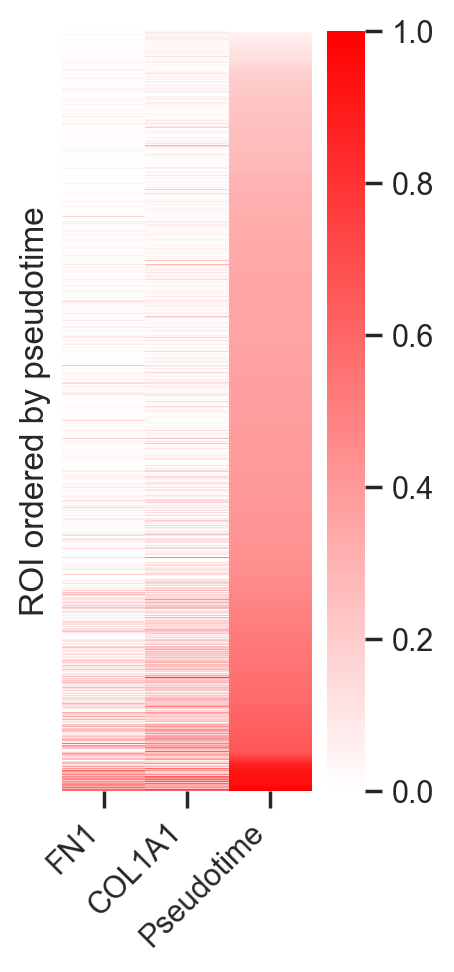

In [64]:
tmp = sub.to_df()
tmp["Pseudotime"] = sub.obs["Pseudotime"].tolist()
plt.figure(figsize=(2,5))
ax=sns.heatmap(tmp[["FN1", "COL1A1", "Pseudotime"]], cmap=cmap)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.yticks([],[])
ax.set_ylabel("ROI ordered by pseudotime")

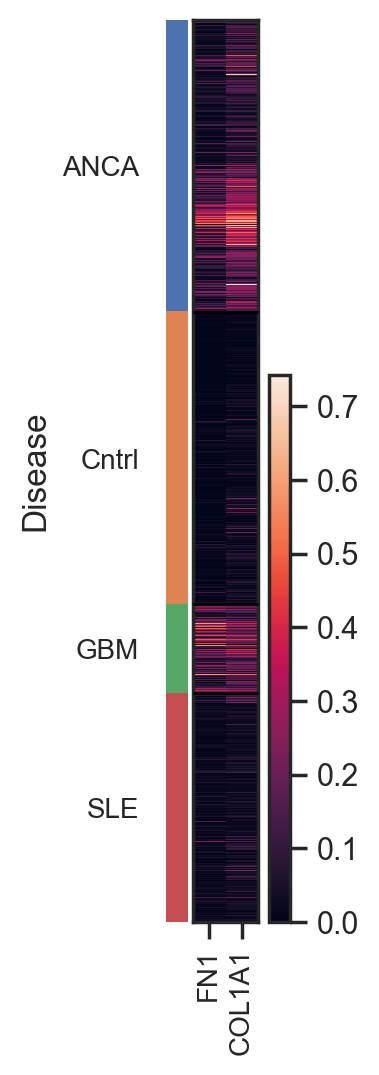

In [45]:
sc.pl.heatmap(sub, var_names=["FN1", "COL1A1"], groupby="Disease")